In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
t = np.array([1,2,3,4,5,6,7,8,9,10])

In [5]:
y = np.array ([-2.73, -2.71,-2.65,-0.87,-3.1,-1.03,0.63,1.46,5.9,8.38])

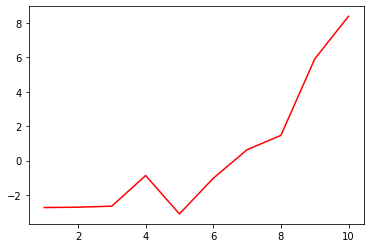

In [6]:
plt.plot (t,y, color='red')

In [7]:
from scipy.optimize import curve_fit

# Define the quadratic model function
def quadratic_model(t, a, b, c):
    return a * t**2 + b * t**1 + c*t**0

# Fit the model to the data
params, covariance = curve_fit(quadratic_model, t, y)

# Parameters
a, b, c = params

# Use the fitted model to make predictions
t_fit = np.linspace(t.min(), t.max(), 100)
y_fit = quadratic_model(t_fit, a, b, c)


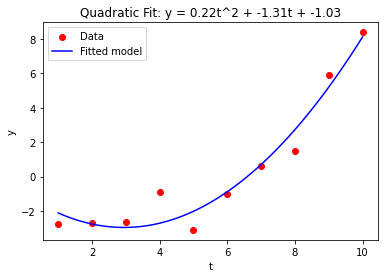

a= 0.2223863636346679
b= -1.310613636368681
c= -1.0255000000044063


In [8]:
# plot
plt.scatter(t, y, label='Data', color='red')
plt.plot(t_fit, y_fit, label='Fitted model', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Fit: y = {:.2f}t^2 + {:.2f}t + {:.2f}'.format(a, b, c))
plt.legend()
plt.show()

print("a=", a)
print('b=', b)
print('c=', c)

In [9]:
# Standard deviations
std_devs = np.sqrt(np.diag(covariance))

print ('sigma a = ', std_devs [0])
print ('sigma b = ', std_devs [1])
print ('sigma c = ', std_devs [2])

sigma a =  0.04421018575150351
sigma b =  0.4990074830313166
sigma c =  1.1948206758144173


In [12]:
# forecast when t=12 

t_12 = 12
y_12 = quadratic_model(t_12, a, b, c)
print(y_12)

y_error_12 = np.sqrt((t_12**2 * std_devs[0])**2 + (t_12 * std_devs[1])**2 + (std_devs[2])**2)
print(y_error_12)



15.2707727269636
8.821233936715473


In [13]:
# forecast when t=11
t_11 = 11
y_11 = quadratic_model(t_11, a, b, c)
y_11

11.466499999734921

In [14]:
# extend to t=12
t_fit_12 = np.linspace(t.min(), 12, 200)
y_fit_12 = quadratic_model(t_fit_12, a, b, c)

In [15]:
#error to t=12
y_error = np.sqrt((t_fit_12**2 * std_devs[0])**2 + (t_fit_12 * std_devs[1])**2 + (std_devs[2])**2)

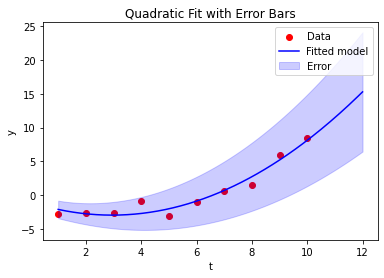

In [16]:
# plot 
plt.scatter(t, y, label='Data', color='red')  # Original data points
plt.plot(t_fit_12, y_fit_12, label='Fitted model', color='blue')  # Extended fitted curve
plt.fill_between(t_fit_12, y_fit_12 - y_error, y_fit_12 + y_error, color='blue', alpha=0.2, label='Error')  # Extended error bounds

plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Fit with Error Bars')
plt.legend()
plt.show()


In [17]:
# try to perform using bayesian 

# 1. Design matrix A and parameter vector B
A = np.vstack([np.ones(len(t)), t, t**2]).T  # Design matrix
B = np.array([[0], [0], [0]])  # Initial parameter vector, [c, b, a]

# Assume sigma (standard deviation of y values) for the prior
sigma = np.std(y)  

sigma

3.738105937503645

In [18]:
# 3. Likelihood function
def likelihood(A, B, y, sigma):
    residuals = y - A @ B  
    return (1 / (np.sqrt(2 * np.pi) * sigma) ** len(y)) * np.exp(-0.5 * (residuals.T @ residuals) / sigma**2)


In [19]:
B_estimated = np.linalg.inv(A.T @ A) @ A.T @ y  

print("Estimated parameters (c, b, a):", B_estimated)


Estimated parameters (c, b, a): [-1.0255     -1.31061364  0.22238636]


In [20]:
std_estimated = (A@B_estimated - y).T@ (A@B_estimated - y)
std_estimated = std_estimated /11 #11 =10+1=N+1
std_estimated

0.6567256611570248

In [21]:
# Compute the likelihood with the estimated parameters
likelihood_value = likelihood(A, B_estimated.reshape(-1, 1), y, sigma)

print("Estimated parameters (c, b, a):", B_estimated)
print("Likelihood of the estimated parameters:", likelihood_value)


Estimated parameters (c, b, a): [-1.0255     -1.31061364  0.22238636]
Likelihood of the estimated parameters: [[5.89075060e-14 6.02108699e-14 6.42965544e-14 4.50886646e-13
  3.92954001e-14 3.78471556e-13 2.32748731e-12 5.77184103e-12
  7.43466512e-10 1.12147706e-08]
 [6.02108699e-14 6.15342636e-14 6.56815398e-14 4.54768901e-13
  4.02713271e-14 3.82167640e-13 2.32246248e-12 5.72527174e-12
  7.14403596e-10 1.05868016e-08]
 [6.42965544e-14 6.56815398e-14 7.00180810e-14 4.66617381e-13
  4.33469575e-14 3.93473877e-13 2.30745297e-12 5.58780619e-12
  6.33855543e-10 8.90610702e-09]
 [4.50886646e-13 4.54768901e-13 4.66617381e-13 1.00078816e-12
  3.84755427e-13 9.34447872e-13 1.90368907e-12 2.71716796e-12
  1.82266941e-11 5.27724939e-11]
 [3.92954001e-14 4.02713271e-14 4.33469575e-14 3.84755427e-13
  2.49596522e-14 3.16192049e-13 2.42243271e-12 6.70505139e-12
  1.55467758e-09 3.25659977e-08]
 [3.78471556e-13 3.82167640e-13 3.93473877e-13 9.34447872e-13
  3.16192049e-13 8.64549294e-13 1.93688995e

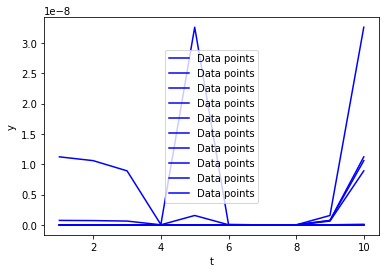

In [22]:
plt.plot(t, likelihood_value, color='blue', label='Data points')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()


In [27]:
# NEW try 
# fit into linear regression 
t = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]).reshape(-1, 1)  # Reshape for sklearn
y = np.array([-2.73, -2.71, -2.65, -0.87, -3.10, -1.03, 0.63, 1.46, 5.90, 8.38])

In [28]:
# Prepare the design matrix for quadratic model: y = a*t^2 + b*t + c
A = np.hstack([np.ones_like(t), t, t**2])

In [29]:
# Create and fit the model
model = LinearRegression().fit(A, y)

# The coefficients and intercept
a, b, c = model.coef_[1], model.coef_[2], model.intercept_


In [30]:
# Residuals
residuals = y - model.predict(A)
# Residual standard error
rss = np.sum(residuals**2) / (A.shape[0] - A.shape[1])
# Standard errors
se = np.sqrt(np.diag(rss * np.linalg.inv(A.T @ A)))
se_a, se_b, se_c = se[1], se[2], se[0]

# Print the estimated parameters and their standard errors
print(f"Estimated parameters: a = {a}, b = {b}, c = {c}")
print(f"Standard errors: se_a = {se_a}, se_b = {se_b}, se_c = {se_c}")

Estimated parameters: a = -1.310613636363636, b = 0.22238636363636366, c = -1.025500000000002
Standard errors: se_a = 0.4990074947887775, se_b = 0.04421018726725132, se_c = 1.1948206964868187


In [31]:
# Prediction for t = 12
t_predict = np.array([[1, 12, 144]])  # Including 1 for intercept
y_predict = model.predict(t_predict)
print(f"Prediction for t = 12: {y_predict[0]}")


Prediction for t = 12: 15.270772727272734


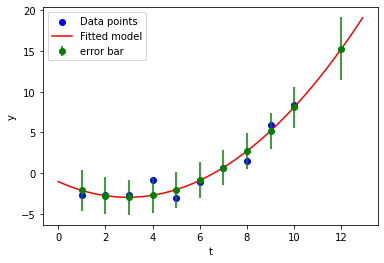

In [36]:
# Plot the fitted model, data points, and error bars
t_extended = np.vstack([t, [[12]]])  # Add t=12 for prediction
A_extended = np.hstack([np.ones_like(t_extended), t_extended, t_extended**2])
predictions = model.predict(A_extended)
CI = 1.96 * np.sqrt(rss * (1 + np.diag(np.dot(A_extended, np.dot(np.linalg.inv(np.dot(A.T, A)), A_extended.T)))))

plt.scatter(t, y, color='blue', label='Data points')
plt.plot(t_line, y_line, color='red', label='Fitted model')
plt.errorbar(t_extended.flatten(), predictions, yerr=CI, fmt='o', color='green', label='error bar')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()


In [26]:
pip install scikit-learn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
